# Qual o problema quero resolver com a solução de ML?

- R: Como aumentar a taxa de aprovação, reduzindo a inadimplência ao mesmo tempo?

### Entendimento do negócio:

Imaginando que uma pessoa que deseja obter um crédito com o banco, é desejável ter uma alta precisão, pois o banco não gostaria de perder clientes que tiveram um empréstimo negado com base na previsão do modelo de que seriam inadimplentes.

- Que tipo de crédito o cliente oferece?
- Em que parte do processo de aprovação de crédito, o modelo será aplicado?
- Qual o valor dos emprestimos que os clientes inadimplentes mais adquirem?
- Todas as features presentes no dataset ajudam a responder o desejo do cliente?

### Entendimento Dataset:

- idade: A idade do cliente..
- numero_de_dependentes: O número de pessoas dependentes do cliente.
- salario_mensal: Salário mensal do cliente.
- numero_emprestimos_imobiliarios: Quantidade de empréstimos imobiliários que o cliente possui em aberto.
- numero_vezes_passou_90_dias: Número de vezes que o tomador passou mais de 90 dias em atraso.
- util_linhas_inseguras: Quanto que o cliente está usando, relativamente ao limite dele, de linhas de crédito que não são seguradas por qualquer bem do tomador e.g: imoveis, carros etc.
- vezes_passou_de_30_59_dias: Número de vezes que o cliente atrasou, entre 30 e 59 dias, o pagamento de um empréstimo.
- razao_debito: Razão entre as dívidas e o patrimônio do tomador. razão débito Dividas/Patrimônio
- numero_linhas_crdto_aberto: Número de empréstimos em aberto pelo cliente.
- numero_de_vezes_que_passou_60_89_dias: Número de vezes que o cliente atrasou, entre 60 e 89 dias, o pagamento de um empréstimo.

### Imports iniciais necessários

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import MinMaxScaler

In [3]:
df_train = pd.read_csv('treino.csv')
df_test = pd.read_csv('teste.csv')

Primeiramente, foi utilizada a função head(), tanto no dataframe de treino e teste de maneira que possa possilitar uma visão geral da estrutura dos dados.

In [4]:
df_train.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df_test.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0


Visualizar todas as colunas do dataset

In [6]:
df_train.columns

Index(['inadimplente', 'util_linhas_inseguras', 'idade',
       'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',
       'numero_emprestimos_imobiliarios',
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes'],
      dtype='object')

# 0 - Pré processando e analisando os dados

### Análise Estatistica

O metódo .info() imprime as informações sobre um DataFrame, incluindo o dtype, as colunas do índice, valores não nulos e uso de memória.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  int64  
 3   vezes_passou_de_30_59_dias             110000 non-null  int64  
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         88237 non-null   float64
 6   numero_linhas_crdto_aberto             110000 non-null  int64  
 7   numero_vezes_passou_90_dias            110000 non-null  int64  
 8   numero_emprestimos_imobiliarios        110000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 10  numero_de_dependentes                  107122 non-null  

O método describe() exibe informações estatística da base de dados

 - count: a quantidade de linhas
 - mean: média dos valores por coluna
 - std: desvio padrão
 - min: valor mínimo
 - quartis (25%,50% e 75%)
 - max: valor máximo

In [8]:
df_train.describe()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,8.823700e+04,110000.000000,110000.000000,110000.000000,110000.000000,107122.000000
mean,0.066645,5.929979,52.255636,0.424055,354.823589,6.637411e+03,8.445573,0.269955,1.019891,0.243891,0.757482
std,0.249408,252.301965,14.768241,4.240780,2074.140421,1.338395e+04,5.139026,4.217326,1.135989,4.204137,1.114670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030054,41.000000,0.000000,0.175016,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.155936,52.000000,0.000000,0.366682,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.562806,63.000000,0.000000,0.866874,8.225000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [9]:
#Porcentagem de numeros em branco
df_train.isnull().sum() / len(df_train)*100

inadimplente                              0.000000
util_linhas_inseguras                     0.000000
idade                                     0.000000
vezes_passou_de_30_59_dias                0.000000
razao_debito                              0.000000
salario_mensal                           19.784545
numero_linhas_crdto_aberto                0.000000
numero_vezes_passou_90_dias               0.000000
numero_emprestimos_imobiliarios           0.000000
numero_de_vezes_que_passou_60_89_dias     0.000000
numero_de_dependentes                     2.616364
dtype: float64

Há dados ausentes nas colunas de numero_de_dependentes e salario_mensal. Vou utilizar a média para preencher os dados faltantes.

In [10]:
#Verificando se tem campos em branco base de teste
df_test.isnull().sum()

util_linhas_inseguras                       0
idade                                       0
vezes_passou_de_30_59_dias                  0
razao_debito                                0
salario_mensal                           7968
numero_linhas_crdto_aberto                  0
numero_vezes_passou_90_dias                 0
numero_emprestimos_imobiliarios             0
numero_de_vezes_que_passou_60_89_dias       0
numero_de_dependentes                    1046
dtype: int64

Qual o total de salarios em branco, que são inadimplentes?

In [11]:
print("Total de indimplentes com salário em branco:",df_train[(df_train['salario_mensal'].isnull()) & (df_train['inadimplente'] == 1)].shape[0])
print("Total de indimplentes com nº dependentes em branco:",df_train[(df_train['numero_de_dependentes'].isnull()) & (df_train['inadimplente'] == 1)].shape[0])

Total de indimplentes com salário em branco: 1247
Total de indimplentes com nº dependentes em branco: 132


Qual o total de inadimplentes?

In [12]:
df_train.inadimplente.value_counts()

0    102669
1      7331
Name: inadimplente, dtype: int64

Com base nas análises acima, foi verificado que ~17% dos inadimplentes estão com a informação do salário em branco e ~2% estão com a informação do nº do dependente em branco.

#### Qual a % de inadimplentes e não inadimplentes?

In [13]:
total_inadimplente = round(df_train.inadimplente.value_counts() / len(df_train)*100,2)
total_inadimplente

0    93.34
1     6.66
Name: inadimplente, dtype: float64

A base de treino está desbalanceada, vou criar um modelo sem desbalancear e depois um balanceando a base.

## Tratamento da base

### Tratamento do Dataset

Conforme informado anteriormente, as colunas salario_mensal e numero_de_dependentes possuem valores nulos, foi utilizada a média para preenchimento dos valores nulos, conforme racional descrito abaixo.

In [14]:
#df_train['salario_mensal'].dropna(inplace=True)
#df_train['numero_de_dependentes'].dropna(inplace=True)

- Dropando os valores nulos teve uma leve piora, por conta disso optei por manter a média.

- Acuracia do modelo escolhido quando dropei os valores em branco: 0.9466942750712755

In [15]:
#Preenchi os valores nulos com a média
df_train['salario_mensal'].fillna(df_train['salario_mensal'].mean(), inplace=True)
df_train['numero_de_dependentes'].fillna(df_train['numero_de_dependentes'].mean(), inplace=True)
df_test['salario_mensal'].fillna(df_test['salario_mensal'].mean(), inplace=True)
df_test['numero_de_dependentes'].fillna(df_test['numero_de_dependentes'].mean(), inplace=True)

In [16]:
df_train.isnull().sum()

inadimplente                             0
util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

In [17]:
df_test.isnull().sum()

util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

Agora que temos todos os dados presentes, podemos continuar com a análise. Começamos analisando a correlação entre as variáveis, com foco na inadimplência.

<AxesSubplot:>

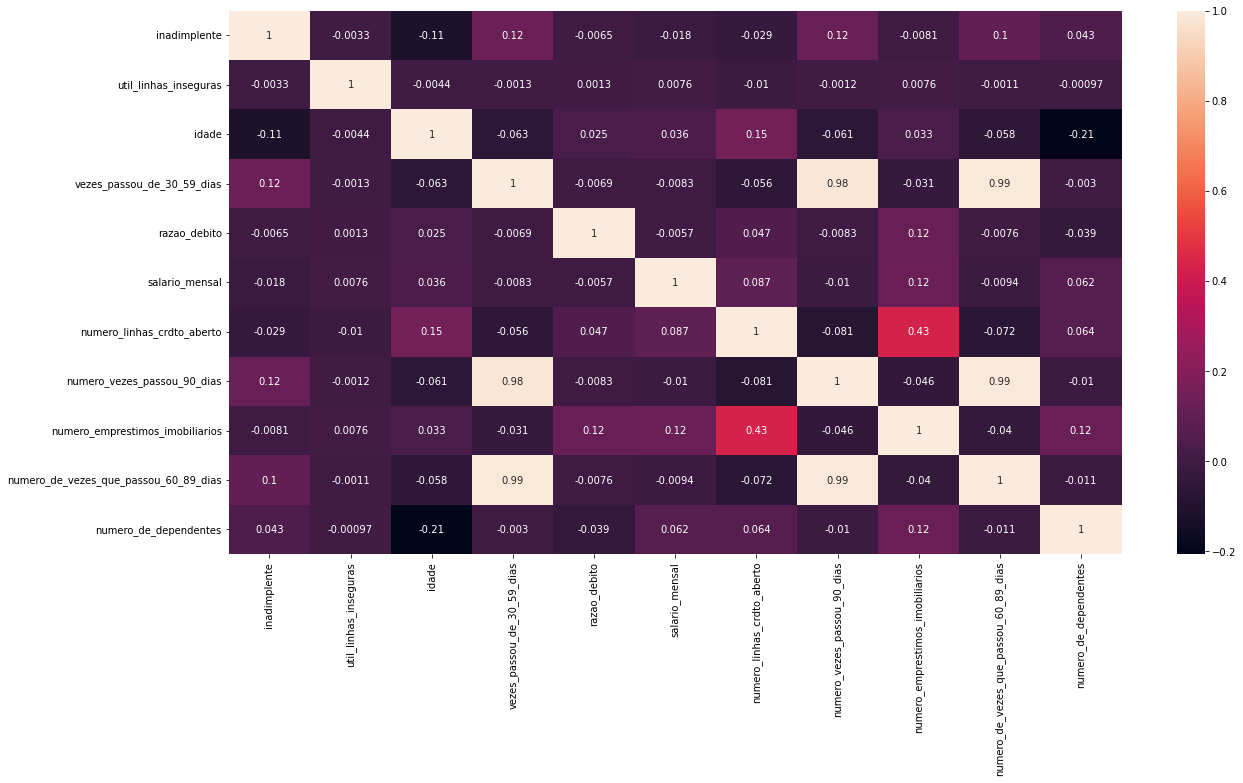

In [18]:
plt.figure(figsize=(20,10))
corr = df_train.corr()
corr = (corr)
sns.heatmap(corr, annot=True)

Algumas variaveis são interessantes, tais como:

- numero_vezes_passou_90_dias
- numreo_de_vezes_que_passou_60_89_dias
- idade
- util_linhas_inseguras

Aparentemente, nenhuma tem uma correlação muito forte

### Análise para verificar se há algum outlier

<AxesSubplot:xlabel='razao_debito'>

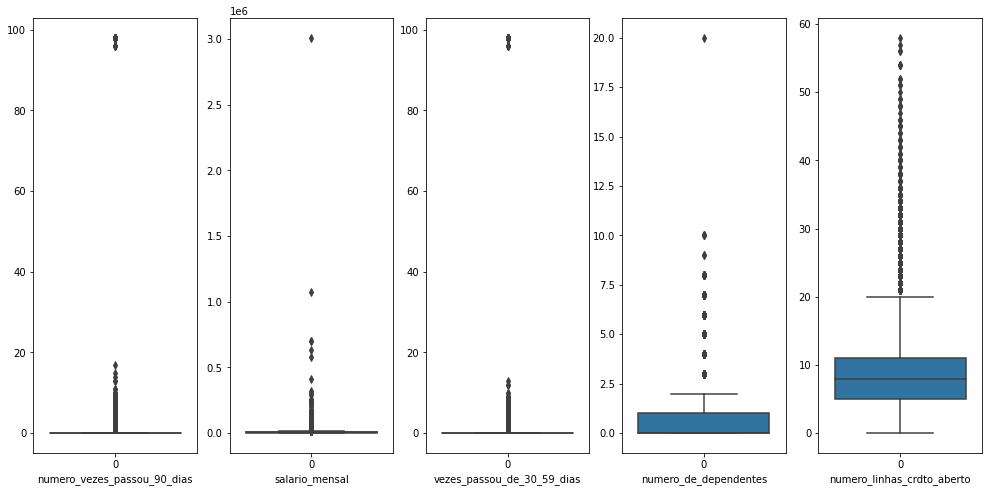

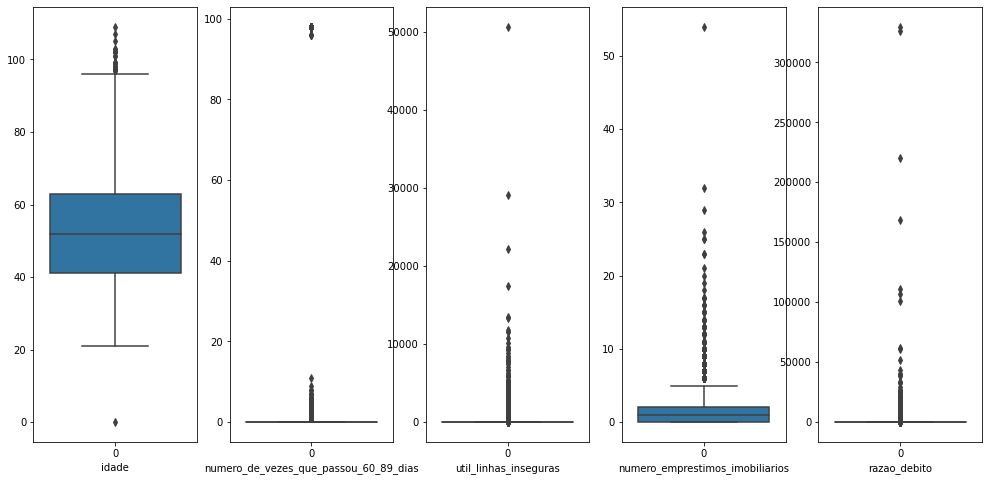

In [19]:
fig,ax = plt.subplots(1,5,figsize=(17,8))
ax[0].set_xlabel('numero_vezes_passou_90_dias')
sns.boxplot(ax=ax[0],data=df_train['numero_vezes_passou_90_dias'])
ax[1].set_xlabel('salario_mensal')
sns.boxplot(ax=ax[1],data=df_train['salario_mensal'])
ax[2].set_xlabel('vezes_passou_de_30_59_dias')
sns.boxplot(ax=ax[2],data=df_train['vezes_passou_de_30_59_dias'])
ax[3].set_xlabel('numero_de_dependentes')
sns.boxplot(ax=ax[3],data=df_train['numero_de_dependentes'])
ax[4].set_xlabel('numero_linhas_crdto_aberto')
sns.boxplot(ax=ax[4],data=df_train['numero_linhas_crdto_aberto'])

fig,ax = plt.subplots(1,5,figsize=(17,8))
ax[0].set_xlabel('idade')
sns.boxplot(ax=ax[0],data=df_train['idade'])
ax[1].set_xlabel('numero_de_vezes_que_passou_60_89_dias')
sns.boxplot(ax=ax[1],data=df_train['numero_de_vezes_que_passou_60_89_dias'])
ax[2].set_xlabel('util_linhas_inseguras')
sns.boxplot(ax=ax[2],data=df_train['util_linhas_inseguras'])
ax[3].set_xlabel('numero_emprestimos_imobiliarios')
sns.boxplot(ax=ax[3], data=df_train['numero_emprestimos_imobiliarios'])
ax[4].set_xlabel('razao_debito')
sns.boxplot(ax=ax[4], data=df_train['razao_debito'])

Como identifiquei outliers, vou realizar o tratamento, para que estes dados não venham impactar o resultado do modelo

In [20]:
#df_train.drop(df_train[df_train['numero_vezes_passou_90_dias']>20].index,inplace=True)

df_train.drop(df_train[df_train['salario_mensal']>15000].index,inplace=True)
df_train.drop(df_train[df_train['salario_mensal']<0].index,inplace=True)

#df_train_tratado.drop(df_train_tratado[df_train_tratado['vezes_passou_de_30_59_dias']>20].index,inplace=True)

df_train.drop(df_train[df_train['numero_de_dependentes']>15].index,inplace=True)

df_train.drop(df_train[df_train['numero_linhas_crdto_aberto']>20].index,inplace=True)
df_train.drop(df_train[df_train['numero_linhas_crdto_aberto']<0].index,inplace=True)

df_train.drop(df_train[df_train['idade']>90].index,inplace=True)
df_train.drop(df_train[df_train['idade']<20].index,inplace=True)

#df_train_tratado.drop(df_train_tratado[df_train_tratado['numero_de_vezes_que_passou_60_89_dias']>20].index,inplace=True)

df_train.drop(df_train[df_train['util_linhas_inseguras']>1500].index,inplace=True)

df_train.drop(df_train[df_train['numero_emprestimos_imobiliarios']>10].index,inplace=True)

df_train.drop(df_train[df_train['razao_debito']>50000].index,inplace=True)

Para as features realizada ao tempo que o cliente atrasou, verifiquei que o modelo piorou quando removi os outliers, por conta disso mantive elas sem realizar nenhuma alteração.

### Como o modelo se comportaria se as pessoas que atrasaram 1 vez mais do que 30 dias, fossem retiradas?

In [21]:
df_train = df_train[df_train['vezes_passou_de_30_59_dias']!=1]

- O modelo desempenhou levemente melhor quando retirei os clientes que atrasaram apenas uma vez

   - Resultado antes de retirar os clientes -> 0.9475370944582024
   - Resultado depois de retirar os clientes ->0.9508155207937659

# 1 - Baseline

## Criando a baseline

#### Separando e tratando o conjunto de dados para baseline

In [22]:
target_name = 'inadimplente'
X = df_train.drop('inadimplente', axis=1)
y = df_train[target_name]

In [23]:
X.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
3,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
5,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.0
6,0.305682,57,0,5710.000000,6637.411063,8,0,3,0,0.0


In [24]:
y.head()

0    1
1    0
3    0
5    0
6    0
Name: inadimplente, dtype: int64

np.zeros -> retorna um array preenchido com zeros

In [25]:
def baseline_model(X):
  y = np.zeros(X.shape[0])
  return y

In [26]:
#Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(
   X, 
   y, 
   random_state=0, 
   test_size=0.50,
   stratify=y
   )

In [27]:
#Analise do baseline
p_val = baseline_model(X_val)

In [28]:
np.mean(y_val == p_val)

0.9428093935842341

# 2 - Padronização e Balanceamento dos dados

Agora vamos verificar o balanceamento do dataset. Caso esteja desbalanceado, podemos realizar um resample.

<AxesSubplot:xlabel='inadimplente', ylabel='count'>

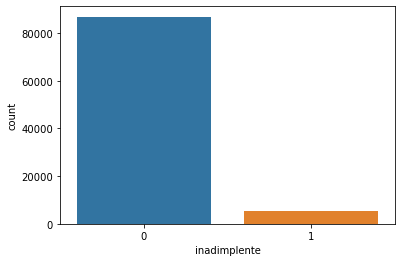

In [29]:
sns.countplot(x = 'inadimplente',data=df_train)

Como podemos perceber, o dataset é extremamente desbalanceado, o que torna necessário o balanceamento.

## Paronizando os dados utilizando o SMOTE e o Min_max_scaler

- Smote: Gerar dados sintéticos da classe minoritária
- Min_max_scaler: coloca os resultados das features na mesma proporção

In [30]:
# Separa os dados e as classes
target_name = 'inadimplente'
X = df_train.drop('inadimplente', axis=1)
y = df_train[target_name]

In [31]:
#Vou utilizar o min_max_scaler para deixar todas as features na mesma escala, as escalas dos salarios
#são diferente de outras features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Vamos dividir os dados de treino e teste do dataset padronizado e desbalanceado para fins de comparação, utilizando random_state = 0 para replicabilidade.

In [32]:
X_train, X_val, y_train, y_val = train_test_split(
   X, 
   y, 
   random_state=0, 
   test_size=0.50,
   stratify=y
   )

Agora utilizamos uma tecnica de resample para balancear o dataframe. Algumas técnicas podem ser interessantes, tanto oversampling da classe minoritária, quanto undersampling da majoritária ou mesmo a combinação dos dois podem ser utilizados.

In [33]:
from collections import Counter

In [34]:
# Instância o SMOTE
smt = SMOTE()
#Aplica o SMOTE nos dados
X_balanceado, y_balanceado = smt.fit_resample(X,y)
print(Counter(y),Counter(y_balanceado))

Counter({0: 86877, 1: 5271}) Counter({1: 86877, 0: 86877})


<AxesSubplot:xlabel='inadimplente', ylabel='count'>

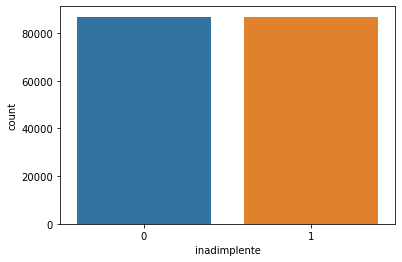

In [35]:
sns.countplot(x=y_balanceado,data=df_train)

Agora dividimos o dataframe balanceado e padronizado para treinamento dos modelos.

In [36]:
X_train_balanceado, X_val_balanceado, y_train_balanceado, y_val_balanceado = train_test_split(
   X_balanceado, 
   y_balanceado, 
   random_state=0, 
   test_size=0.50,
  #stratify=y
   )

## 2.1 - Aplicando o modelo com o dataset balanceado

Com os dados devidamente tratados, foi realizada a escolha do modelo para a predição da ariável, apesar de muitos modelos serem viáveis foram utilizados os que seguem abaixo:

- Regressão Logística;
- Árvores de Decisão;
- Florestas Aleatórias (Random forest)

Cabe ressaltar que a escolha dos algoritmos se deu por opção do autor. A escolha do modelo final levará em conta a maior probabilidade encontrada.

O modelo que apresentar melhor resultado nessa etapa, segue para uma etapa de ajuste paramétrico usando GrindSearch.

No que diz respeito as métricas de avaliação, serão utilizados a precisão e matriz de confusão.

## Logistic Regression

Começamos pelo modelo mais simples, a regressão logística.

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
#Instanciando o algoritmo
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_balanceado,y_train_balanceado)

LogisticRegression(max_iter=1000)

In [39]:
#Calculando as predições
p_val = logistic.predict(X_val_balanceado)

In [40]:
#Avaliando o modelo
np.mean(y_val_balanceado == p_val)

0.6992529668381735

In [41]:
#Resultado ponderado das classes 0 e 1
roc_auc_score(y_val_balanceado, p_val)

0.699387320378574

In [42]:
print(classification_report(y_val_balanceado, p_val))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     43218
           1       0.71      0.67      0.69     43659

    accuracy                           0.70     86877
   macro avg       0.70      0.70      0.70     86877
weighted avg       0.70      0.70      0.70     86877



In [43]:
print(pd.crosstab(y_val_balanceado, p_val, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0      1    All
Real                        
0        31370  11848  43218
1        14280  29379  43659
All      45650  41227  86877


## Arvore de decisão

In [44]:
#Treinando o modelo com arvore de decisão
dtree = DecisionTreeClassifier(min_samples_leaf=10, random_state=0)
dtree = dtree.fit(X_train_balanceado, y_train_balanceado)

O max_depth acerta mais 1 do que o min_samples_leaf

Fiz testes aleatórios setando as informações no max_depth e min_samples_leaf e identifiquei que o min_samples_leaf = 10 possui uma acurácia parecida com a do max_depth, contudo o min_samples_leaf acertou mais 1 do que o max_depth, no teste aleatório realizado.

In [45]:
p_val = dtree.predict(X_val_balanceado)

**Fazendo avaliação do modelo**

In [46]:
#Verificando a acuracia
accuracy_score(p_val, y_val_balanceado)

0.9081229784638052

In [47]:
#Verificando a curva ROC
roc_auc_score(y_val_balanceado, p_val)

0.9082336157166089

O modelo não está bom, só está praticamente acertando o que é 0, ou seja, que não é inadimplente.

Outra métrica utilizada para avaliação, foi a precisão.

In [48]:
print(classification_report(y_val_balanceado, p_val))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     43218
           1       0.93      0.89      0.91     43659

    accuracy                           0.91     86877
   macro avg       0.91      0.91      0.91     86877
weighted avg       0.91      0.91      0.91     86877



Com base na ROC o modelo basicamente só acerta os casos que são 0, quando faz a media entre a classe 0 e 1 a curva ROC mostra uma % de quase 50%, está quase um processo aleatório.

In [49]:
print(pd.crosstab(y_val_balanceado, p_val, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0      1    All
Real                        
0        40194   3024  43218
1         4958  38701  43659
All      45152  41725  86877


## Random Forest

- random_state = uma random_forest quando está criando o modelo tem várias pontos que vai ser utilizada a aleatoriedade e por conta disso é utilizado o random_state para fixar a aleatoriedade, permitindo que os resultados sejam reprodutiveis

- n_jobs = demonstra a quantidade de arvores em paralelo que o modelo irá criar...o -1 informa que serão utilizados todos os threads disponíveis no computador para criação das arvores

- Quando testei os hiperparametros (max_depth e min_samples_leaf) o resultado do max_depth foi melhor, por conta disso utilizei este parâmetro.

- n_estimators = quantidade de arvóres que serão criadas para treinar o modelo

In [50]:
#Treinar o modelo
#Escolhi o random forest pois foi o modelo com mais precoisão nos inadimplentes, antes de aplicar o SMOTE
rf = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=500, max_depth=30)

In [51]:
rf.fit(X_train_balanceado, y_train_balanceado)

RandomForestClassifier(max_depth=30, n_estimators=500, n_jobs=-1,
                       random_state=0)

In [59]:
p_val = rf.predict(X_val_balanceado)

In [60]:
#Avaliando o modelo
print(np.mean(y_val_balanceado == p_val))
#print(roc_auc_score(y_val, p_val))
print(classification_report(y_val_balanceado, p_val))
print(pd.crosstab(y_val_balanceado, p_val, rownames=['Real'],colnames=['Predito'],margins=True))

0.9498946786836562
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     43218
           1       0.97      0.93      0.95     43659

    accuracy                           0.95     86877
   macro avg       0.95      0.95      0.95     86877
weighted avg       0.95      0.95      0.95     86877

Predito      0      1    All
Real                        
0        41813   1405  43218
1         2948  40711  43659
All      44761  42116  86877


Vamos verificar quais as principais variaveis para o modelo

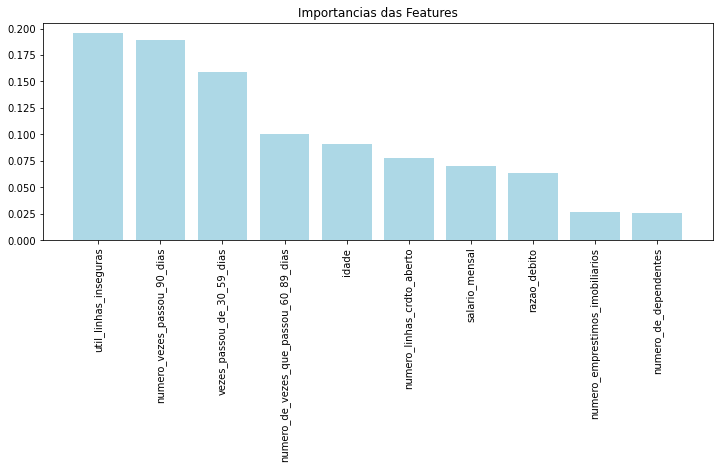

In [61]:
#Verificar quais as principais variaveis para o modelo
importances = rf.feature_importances_
feat_names = df_train.drop(['inadimplente'], axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Importancias das Features")
plt.bar(range(len(indices)), importances[indices],color='lightblue')
plt.xticks(range(len(indices)), feat_names[indices], rotation = 'vertical')
plt.show()

A random forest teve os melhores resultados, além disso conseguiu bater a baseline. Portanto esse será o escolhido para fazer predição.

## Analisando os hiperparametros para melhorar o modelo selecionado

Vamos analisar os parametros para tentar identificar se há como melhorar o modelo

In [81]:
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from skopt import dummy_minimize

In [74]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [72]:
from skopt import dummy_minimize

In [85]:
def treinar_modelo(params):
    #n_estimators = params[0]
    criterion = params[0]
    max_depth = params[1]
    #min_samples_leaf = params[2]
    max_features = params[2]
    
    print(params,'\n')
    
    mdl = RandomForestClassifier(criterion=criterion, max_depth=max_depth, 
                                 #min_samples_leaf=min_samples_leaf, 
                                 max_features = max_features,
                                 random_state=0, n_jobs=-1, n_estimators=500)
    mdl.fit(X_train_balanceado, y_train_balanceado)
    
    p = mdl.predict(X_val_balanceado)
    return -roc_auc_score(y_val_balanceado, p)

space = [('gini', 'entropy'), #criterion
         (1, 9), # max_depth
         (1, 9)] # max_features

resultado = dummy_minimize(treinar_modelo,space,random_state=0,verbose=True,n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
['entropy', 1, 4] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 4.7117
Function value obtained: -0.8223
Current minimum: -0.8223
Iteration No: 2 started. Evaluating function at random point.
['entropy', 8, 4] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 17.7867
Function value obtained: -0.8677
Current minimum: -0.8677
Iteration No: 3 started. Evaluating function at random point.
['entropy', 5, 8] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 28.1945
Function value obtained: -0.8567
Current minimum: -0.8677
Iteration No: 4 started. Evaluating function at random point.
['entropy', 9, 2] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 15.5929
Function value obtained: -0.8674
Current minimum: -0.8677
Iteration No: 5 started. Evaluating function at random point.
['entropy', 8, 9] 

Iteration No: 5 ended. Evaluation done at random point.

In [86]:
resultado.x

['gini', 9, 5]

Como a acaturacia dos parametros que eu testei foi menor do que utilizado os valores default, mantive o modelo sem o tunning

# 3 - Predição do modelo

Importamos os dados de teste, visualizamos e buscamos por dados ausentes.

In [89]:
X_test = df_test.copy()

Antes de avançar para aplicar o modelo, primeiramente vou realizar os tratamentos

In [90]:
#Os valores nulos já foram tratados anteriormente
X_test.isnull().sum()

util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

Vou utilizar o boxplots novamente para ajudar a ver a existência de outliers.

<AxesSubplot:xlabel='razao_debito'>

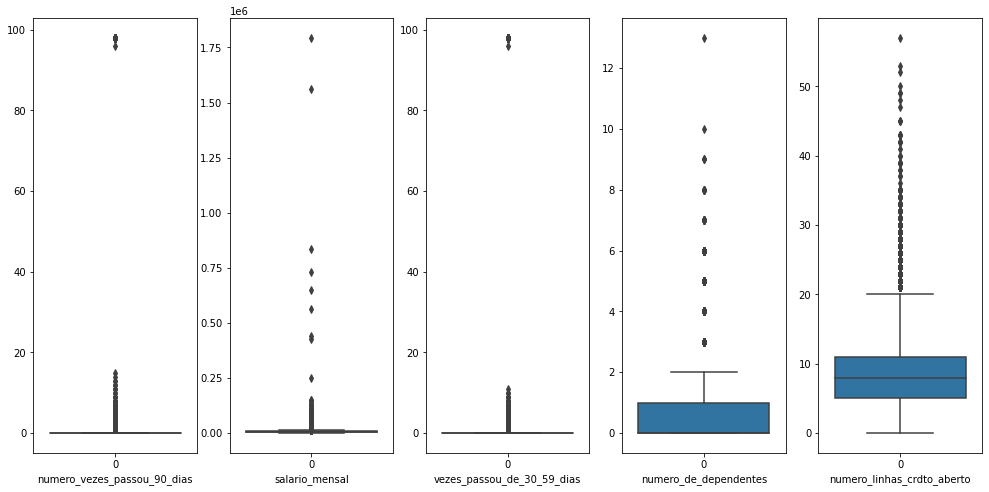

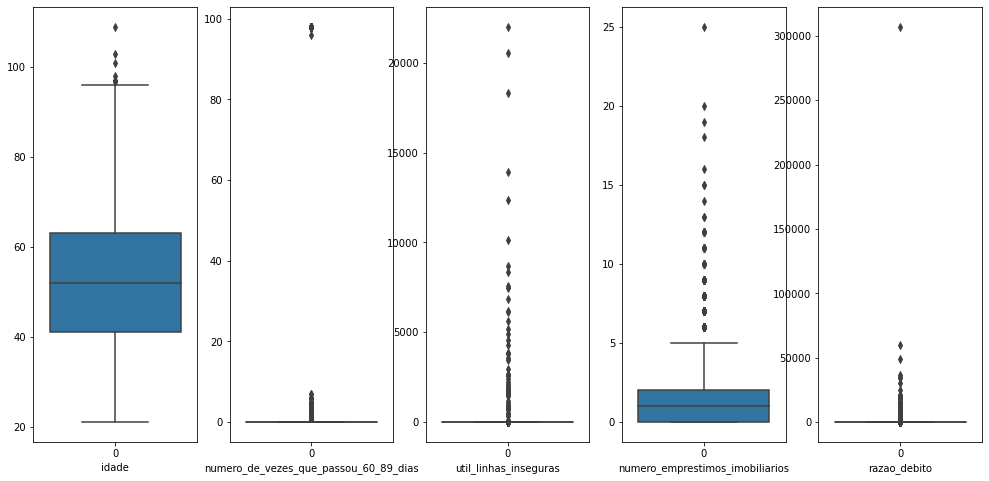

In [91]:
fig,ax = plt.subplots(1,5,figsize=(17,8))
ax[0].set_xlabel('numero_vezes_passou_90_dias')
sns.boxplot(ax=ax[0],data=X_test['numero_vezes_passou_90_dias'])
ax[1].set_xlabel('salario_mensal')
sns.boxplot(ax=ax[1],data=X_test['salario_mensal'])
ax[2].set_xlabel('vezes_passou_de_30_59_dias')
sns.boxplot(ax=ax[2],data=X_test['vezes_passou_de_30_59_dias'])
ax[3].set_xlabel('numero_de_dependentes')
sns.boxplot(ax=ax[3],data=X_test['numero_de_dependentes'])
ax[4].set_xlabel('numero_linhas_crdto_aberto')
sns.boxplot(ax=ax[4],data=X_test['numero_linhas_crdto_aberto'])

fig,ax = plt.subplots(1,5,figsize=(17,8))
ax[0].set_xlabel('idade')
sns.boxplot(ax=ax[0],data=X_test['idade'])
ax[1].set_xlabel('numero_de_vezes_que_passou_60_89_dias')
sns.boxplot(ax=ax[1],data=X_test['numero_de_vezes_que_passou_60_89_dias'])
ax[2].set_xlabel('util_linhas_inseguras')
sns.boxplot(ax=ax[2],data=X_test['util_linhas_inseguras'])
ax[3].set_xlabel('numero_emprestimos_imobiliarios')
sns.boxplot(ax=ax[3], data=X_test['numero_emprestimos_imobiliarios'])
ax[4].set_xlabel('razao_debito')
sns.boxplot(ax=ax[4], data=X_test['razao_debito'])

Com os dados ausentes tratados, é hora de padroniza-los. Para tal utilizamos o mesmo min_max_scaler utilizado nos dados de treino. Pois, utilizar um novo Scaler, ajustado para os dados de teste, fará com que as proporções sejam muito diferentes, visto que há outliers grandes nos dados de teste.

In [92]:
X_test = scaler.transform(X_test)

Com os dados padronizados, podemos realizar as previsões.

In [93]:
p_test = rf.predict(X_test)

In [94]:
p_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Com as previsões feitas, podemos salva-las no arquivo de teste.

In [95]:
df_test['inadimplente'] = p_test

In [96]:
df_test.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0,0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0,0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0,0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0,0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0,0


In [97]:
df_test[df_test['inadimplente']==1]

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente
7,0.000000,76,1,0.261611,1700.000000,4,0,0,0,0.000000,1
9,0.479899,41,1,0.209903,8441.000000,6,0,3,0,0.000000,1
11,0.843405,56,1,0.592720,6400.000000,5,0,2,0,1.000000,1
15,0.594159,64,1,1.648363,7083.000000,19,0,5,0,0.000000,1
18,0.815551,49,1,4081.000000,6760.601836,5,3,2,1,0.756508,1
...,...,...,...,...,...,...,...,...,...,...,...
39982,0.974605,42,1,0.130724,1200.000000,3,0,0,1,0.000000,1
39984,0.420788,48,1,1333.000000,6760.601836,7,0,0,0,0.000000,1
39989,0.963580,27,0,121.000000,6760.601836,1,0,0,1,0.000000,1
39995,0.000000,68,1,0.062858,10833.000000,9,1,0,0,0.000000,1


In [98]:
df_test.to_csv('resultado_predic_rafael_santos.csv')